In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree

<ipython-input-59-d4d39ccf177a>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y_numeric == i][:, 0], X[y_numeric == i][:, 6], label=class_labels[i], c=colors[i], s=50, cmap='rainbow')


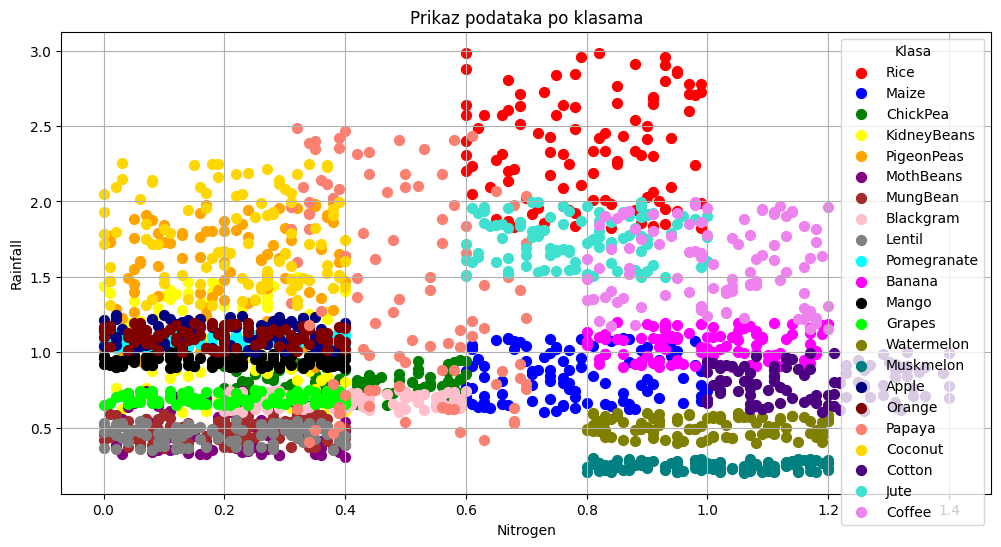

In [59]:
# Ucitavanje podataka i njihov prikaz na grafiku koristeci kolon fosfor i kolicinu kise

data = np.loadtxt('crop.csv',delimiter=',',skiprows=1,dtype=str,encoding=None)

nitrogen = data[:, 0].astype(float)
phosphorus = data[:, 1].astype(float)
potassium = data[:, 2].astype(float)
temperature = data[:, 3].astype(float)
humidity = data[:, 4].astype(float)
ph_value = data[:, 5].astype(float)
rainfall = data[:, 6].astype(float)
y = data[:, 7]

class_map = {'Rice': 0,'Maize': 1,'ChickPea': 2,'KidneyBeans': 3,'PigeonPeas': 4,
             'MothBeans': 5,'MungBean': 6,'Blackgram': 7,'Lentil': 8,'Pomegranate': 9,
             'Banana': 10,'Mango': 11,'Grapes': 12,'Watermelon': 13,'Muskmelon': 14,
             'Apple': 15,'Orange': 16,'Papaya': 17,'Coconut': 18,'Cotton': 19,
             'Jute': 20,'Coffee': 21}
y_numeric = np.array([class_map[label] if label in class_map else label for label in y])
X = np.column_stack((nitrogen/100, phosphorus/100, potassium/100, temperature/100, humidity/100, ph_value/100, rainfall/100))

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan',
          'magenta', 'black', 'lime', 'olive', 'teal', 'navy', 'maroon', 'salmon', 'gold', 'indigo', 'turquoise', 'violet']

class_labels = [key for key, value in class_map.items()]

plt.figure(figsize=(12, 6))
for i in range(len(np.unique(y_numeric))):
    plt.scatter(X[y_numeric == i][:, 0], X[y_numeric == i][:, 6], label=class_labels[i], c=colors[i], s=50, cmap='rainbow')
plt.xlabel('Nitrogen')
plt.ylabel('Rainfall')
plt.title('Prikaz podataka po klasama')
plt.legend(title='Klasa')
plt.grid(True)
plt.show()



In [60]:
tree = DecisionTreeClassifier().fit(X, y_numeric)
#print(export_text(tree))

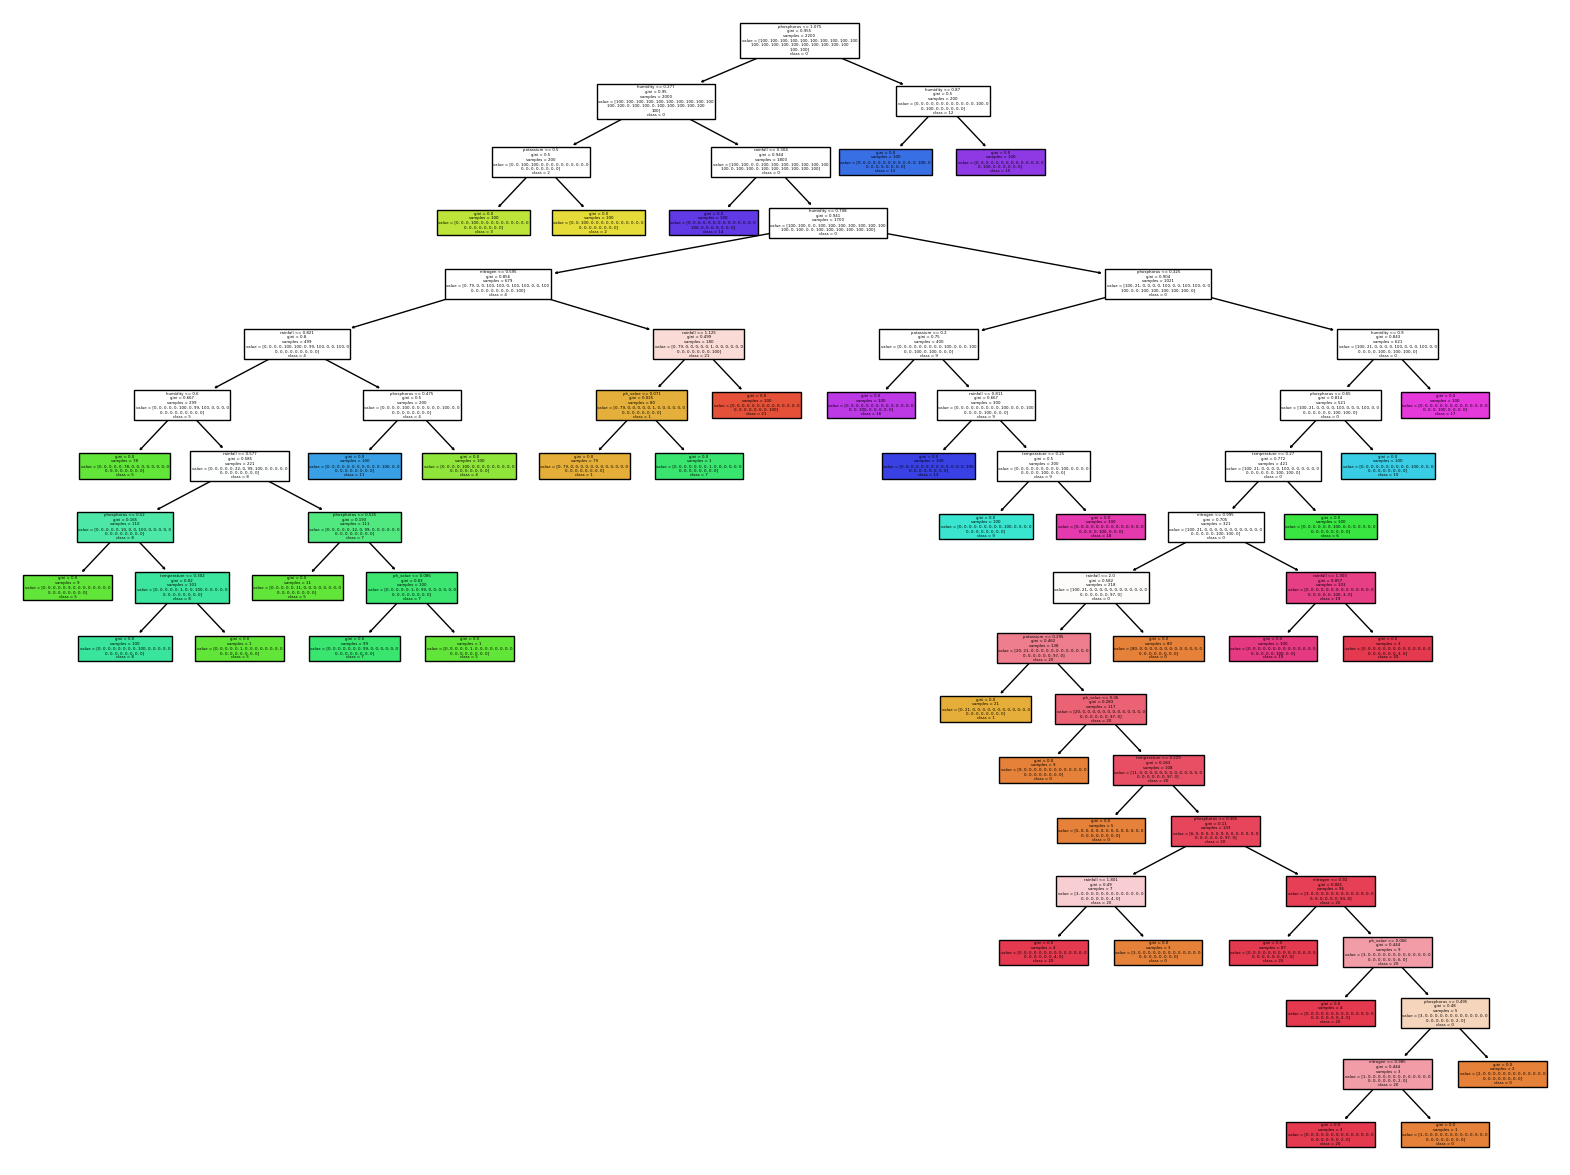

In [61]:

fig = plt.figure(figsize=(20,15))
plot_tree(tree, feature_names=['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph_value', 'rainfall'],
          class_names=[str(x) for x in np.unique(y_numeric)],
          filled=True);
plt.show()

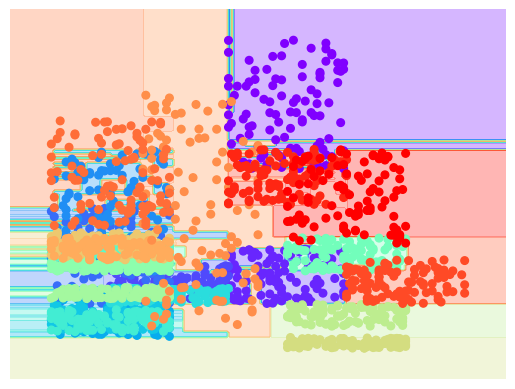

In [62]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    ax.scatter(X[:, 0], X[:, 6], c=y, s=30, cmap=cmap, zorder=3)
    ax.axis('tight')
    ax.axis('off')

    x_margin = (X[:, 0].max() - X[:, 0].min()) * 0.1
    y_margin = (X[:, 6].max() - X[:, 6].min()) * 0.1
    xlim = (X[:, 0].min() - x_margin, X[:, 0].max() + x_margin)
    ylim = (X[:, 6].min() - y_margin, X[:, 6].max() + y_margin)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    model.fit(X[:, [0, 6]], y)

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(DecisionTreeClassifier(), X, y_numeric)

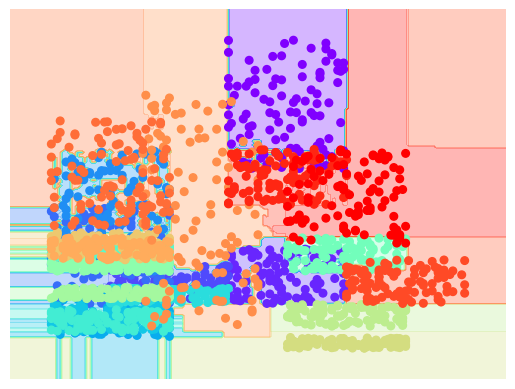

In [63]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y_numeric);
